# Digital Skills: Automated Image and Video Data Analysis with Python
## _University of Lucerne (Jan. 25, 2024)_
### Instructor:
### Dr. Natalia Umansky (University of Zurich)


# Session 5: OCR

## 0. Install the packages/modules that we'll be using. Set up GPU.

These google-colab notebooks allow us to run code in virtual machines located elsewhere. Every time we start a session, the virtual machine is "empty", so non-native python modules need to be installed. Let's install the ones we'll need in this particular notebook. We'll do so using `pip` and the `!` marker that allows us to run `bash` code in the same notebook.

In [1]:
# - before getting started, set up GPU.
import torch

# - get the GPU device name.
device_name = torch.cuda.get_device_name(0)

# - the device name should look like the following:
if torch.cuda.device_count() >= 1:
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: Tesla T4


## 1. Load the modules that we'll be using

In [3]:
from google.colab import drive # module to mount the google drive
import os
from PIL import Image
import json
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import ast
import csv
# - pytorch for deep learning modeling
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
!pip install easyocr
import easyocr #image to text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 35.8 MB/s eta 0:00:00


## 2. Mount the Google Drive for the workshop to this virtual machine

In [4]:
# - it will generate a url. Click on it, specify the google account you want to
#   use, and give access to it
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## 3. Declare the data path

In [5]:
data_path = '/content/gdrive/MyDrive/lucerne-digital-skills/data/'

## 4. Load example image

In [6]:
# - load an image to use for testing
img_path = '{}meme_1.jpg'.format(data_path)
img = Image.open(img_path).convert('RGB')

In [7]:
img

Output hidden; open in https://colab.research.google.com to view.

In [9]:
reader = easyocr.Reader(['en'])
text = reader.readtext(img_path, detail = 0)

In [10]:
text

['NO STRESS', 'JUST VBTNG']

#### Let's try another example

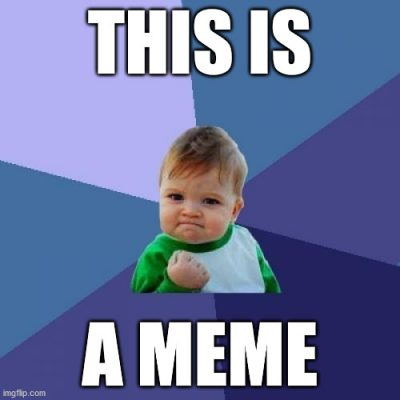

In [11]:
# - load an image to use for testing
img_path2 = '{}meme_2.jpg'.format(data_path)
img2 = Image.open(img_path2).convert('RGB')

img2

In [14]:
text = reader.readtext(img_path2, detail = 0)

text

['THIS IS', 'AMEME', 'monp com']

#### Last one

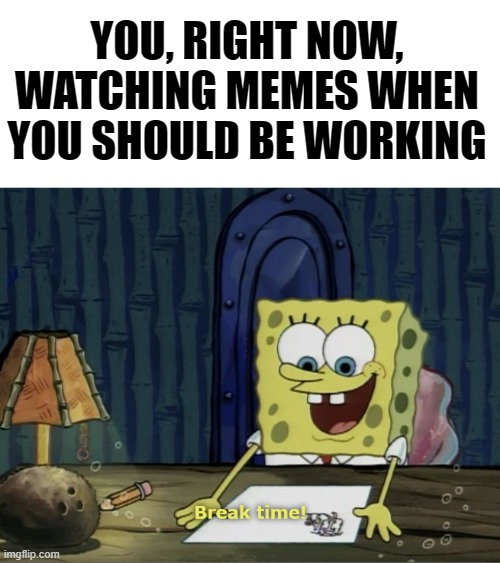

In [15]:
# - load an image to use for testing
img_path3 = '{}meme_3.png'.format(data_path)
img3 = Image.open(img_path3).convert('RGB')

img3

In [16]:
text = reader.readtext(img_path3, detail = 0)

text

['YOU, RIGHT NOW;',
 'WATCHING MEMES WHEN',
 'YOU SHOULD BE WORKING',
 'Break timel',
 'Me',
 'linglp']